In [29]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#use the citipy module to determine city based on latitude and longitude
from citipy import citipy
#import the datetime module from the datetime library
from datetime import datetime
#for API requests
import requests
#import the API key
from config import weather_api_key
# Import the time module.
import time
# Import linear regression from the SciPy stats module
from scipy.stats import linregress

In [2]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#create a list for holding the cities
cities = []
#identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)

618

In [5]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+weather_api_key

In [6]:
#create an empty list to hold the weather data
city_data = []
#print the start of logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#initializee counters
record_count = 1
set_count = 1

#loop through all the cities in the list
for i, city in enumerate(cities):

    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #create endpoint URL with each city
    city_url = url + "&q=" + city

    #log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count
    record_count += 1
    
    #run an API request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | konya
City not found. Skipping...
Processing Record 2 of Set 1 | aleksandrov gay
Processing Record 3 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | lavrentiya
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | khorixas
Processing Record 8 of Set 1 | srednekolymsk
Processing Record 9 of Set 1 | inderborskiy
City not found. Skipping...
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | kharp
Processing Record 13 of Set 1 | te anau
Processing Record 14 of Set 1 | sangar
Processing Record 15 of Set 1 | itarema
Processing Record 16 of Set 1 | pavlodar
Processing Record 17 of Set 1 | qasigiannguit
Processing Record 18 of Set 1 | vostok
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | mataura
Processing Record 2

Processing Record 37 of Set 4 | pilar
Processing Record 38 of Set 4 | iquitos
Processing Record 39 of Set 4 | georgetown
Processing Record 40 of Set 4 | sao luis de montes belos
Processing Record 41 of Set 4 | kodiak
Processing Record 42 of Set 4 | la ligua
Processing Record 43 of Set 4 | beni suef
Processing Record 44 of Set 4 | sur
Processing Record 45 of Set 4 | berdigestyakh
Processing Record 46 of Set 4 | beidao
Processing Record 47 of Set 4 | sorland
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | cape town
Processing Record 50 of Set 4 | yellowknife
Processing Record 1 of Set 5 | ellisras
Processing Record 2 of Set 5 | barrow
Processing Record 3 of Set 5 | phalombe
Processing Record 4 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 5 | klamath falls
Processing Record 6 of Set 5 | hvolsvollur
Processing Record 7 of Set 5 | tadine
Processing Record 8 of Set 5 | svetlogorsk
Processing Record 9 of Set 5 | mahebourg
Processing

Processing Record 29 of Set 8 | shkotovo-26
City not found. Skipping...
Processing Record 30 of Set 8 | beloha
Processing Record 31 of Set 8 | kropotkin
Processing Record 32 of Set 8 | katherine
Processing Record 33 of Set 8 | tiarei
Processing Record 34 of Set 8 | yerbogachen
Processing Record 35 of Set 8 | najran
Processing Record 36 of Set 8 | nizhniy kuranakh
Processing Record 37 of Set 8 | kattivakkam
Processing Record 38 of Set 8 | khandyga
Processing Record 39 of Set 8 | namibe
Processing Record 40 of Set 8 | mbour
Processing Record 41 of Set 8 | sapouy
Processing Record 42 of Set 8 | liman
Processing Record 43 of Set 8 | sahuaripa
Processing Record 44 of Set 8 | port angeles
Processing Record 45 of Set 8 | santa maria
Processing Record 46 of Set 8 | eremitu
Processing Record 47 of Set 8 | dingzhou
Processing Record 48 of Set 8 | naze
Processing Record 49 of Set 8 | os
City not found. Skipping...
Processing Record 50 of Set 8 | toliary
City not found. Skipping...
Processing Reco

Processing Record 14 of Set 12 | magalia
Processing Record 15 of Set 12 | krasnoselkup
Processing Record 16 of Set 12 | gaoual
Processing Record 17 of Set 12 | novotroitsk
Processing Record 18 of Set 12 | peleduy
Processing Record 19 of Set 12 | katangli
Processing Record 20 of Set 12 | susanville
Processing Record 21 of Set 12 | agirish
Processing Record 22 of Set 12 | the pas
Processing Record 23 of Set 12 | aketi
Processing Record 24 of Set 12 | aneho
Processing Record 25 of Set 12 | moron
Processing Record 26 of Set 12 | tocopilla
Processing Record 27 of Set 12 | praia da vitoria
Processing Record 28 of Set 12 | ulladulla
Processing Record 29 of Set 12 | loubomo
Processing Record 30 of Set 12 | mecca
Processing Record 31 of Set 12 | yuzhnyy
Processing Record 32 of Set 12 | istisu
Processing Record 33 of Set 12 | labrea
Processing Record 34 of Set 12 | iberia
Processing Record 35 of Set 12 | morant bay
Processing Record 36 of Set 12 | razdolinsk
Processing Record 37 of Set 12 | peta

In [7]:
len(city_data)

573

In [25]:
#convert the array of dictionaries to a dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aleksandrov Gay,50.15,48.57,41.65,72,63,8.59,RU,2020-04-18 00:29:38
1,Mar Del Plata,-38.00,-57.56,64.99,72,33,8.05,AR,2020-04-18 00:27:50
2,Lavrentiya,65.58,-171.00,27.41,97,99,11.90,RU,2020-04-18 00:25:14
3,Qaanaaq,77.48,-69.36,13.53,81,0,3.91,GL,2020-04-18 00:29:39
4,Khorixas,-20.37,14.97,68.45,30,0,1.90,NA,2020-04-18 00:29:40
5,Srednekolymsk,67.45,153.68,1.47,92,99,11.12,RU,2020-04-18 00:29:41
6,Vaini,-21.20,-175.20,82.40,65,20,11.41,TO,2020-04-18 00:24:43
7,Ushuaia,-54.80,-68.30,53.60,32,40,23.04,AR,2020-04-18 00:29:42
8,Kharp,66.80,65.81,33.67,90,97,6.46,RU,2020-04-18 00:29:43
9,Te Anau,-45.42,167.72,50.34,60,78,12.46,NZ,2020-04-18 00:29:43


In [26]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Aleksandrov Gay,RU,2020-04-18 00:29:38,50.15,48.57,41.65,72,63,8.59
1,Mar Del Plata,AR,2020-04-18 00:27:50,-38.00,-57.56,64.99,72,33,8.05
2,Lavrentiya,RU,2020-04-18 00:25:14,65.58,-171.00,27.41,97,99,11.90
3,Qaanaaq,GL,2020-04-18 00:29:39,77.48,-69.36,13.53,81,0,3.91
4,Khorixas,NA,2020-04-18 00:29:40,-20.37,14.97,68.45,30,0,1.90
...,...,...,...,...,...,...,...,...,...
568,Vieux-Habitants,GP,2020-04-18 00:34:45,16.06,-61.77,78.80,78,21,6.93
569,Bastia,FR,2020-04-18 00:34:46,42.67,9.33,57.20,100,90,2.24
570,Lalmohan,BD,2020-04-18 00:34:46,22.34,90.74,81.48,81,9,12.68
571,Baoying,CN,2020-04-18 00:34:47,33.23,119.31,56.80,62,92,10.60


In [15]:
#create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
#extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

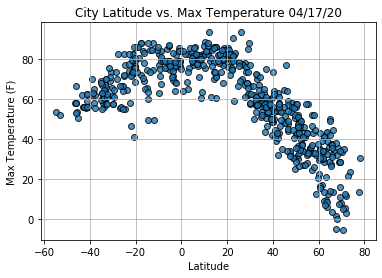

In [20]:
#build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

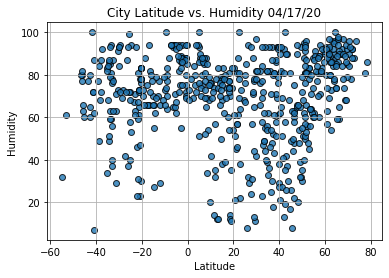

In [66]:
#build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

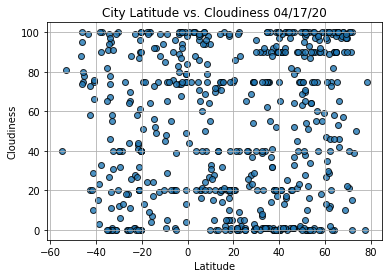

In [67]:
#build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

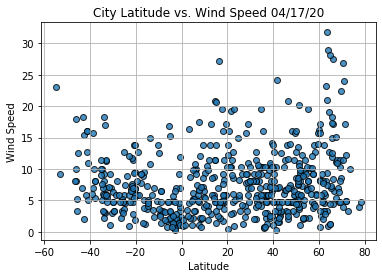

In [69]:
#build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig4.png")

#show plot
plt.show()

In [70]:
#perform linear regression to predict max_temp for lat 
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)
#get the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

#calculate regression line "y values" from the slope and intercept and create new list
regress_values = [(lat * slope + intercept) for lat in lats]

y = -0.4x + 67.18
The p-value is: 0.000


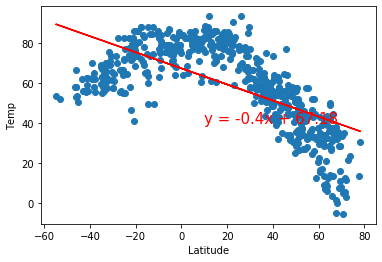

In [71]:
#create a scatter plot of latitues and max_temps
plt.scatter(lats,max_temps)
#plot regression line with latitues (x axis) and predicted max_temps (regress_values) as y axis, and color red
plt.plot(lats,regress_values,"r")
#annotate with line equation as text, add coordinates, axes titles, and color red
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [72]:
index_13=city_data_df.loc[13]
index_13


City                Qasigiannguit
Country                        GL
Date          2020-04-18 00:29:46
Lat                         68.82
Lng                        -51.19
Max Temp                     28.4
Humidity                       68
Cloudiness                     98
Wind Speed                    4.7
Name: 13, dtype: object

In [73]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
568     True
569     True
570     True
571     True
572    False
Name: Lat, Length: 573, dtype: bool

In [74]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Aleksandrov Gay,RU,2020-04-18 00:29:38,50.15,48.57,41.65,72,63,8.59
2,Lavrentiya,RU,2020-04-18 00:25:14,65.58,-171.00,27.41,97,99,11.90
3,Qaanaaq,GL,2020-04-18 00:29:39,77.48,-69.36,13.53,81,0,3.91
5,Srednekolymsk,RU,2020-04-18 00:29:41,67.45,153.68,1.47,92,99,11.12
8,Kharp,RU,2020-04-18 00:29:43,66.80,65.81,33.67,90,97,6.46
...,...,...,...,...,...,...,...,...,...
567,Lubbock,US,2020-04-18 00:30:01,33.60,-101.83,57.20,44,1,9.17
568,Vieux-Habitants,GP,2020-04-18 00:34:45,16.06,-61.77,78.80,78,21,6.93
569,Bastia,FR,2020-04-18 00:34:46,42.67,9.33,57.20,100,90,2.24
570,Lalmohan,BD,2020-04-18 00:34:46,22.34,90.74,81.48,81,9,12.68


In [75]:
#create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


In [76]:
#function for linear regression equation and plot regression line with labels  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #rn regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

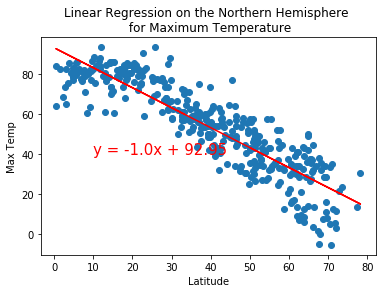

In [77]:
#linear regression on the northern_hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#call regression function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

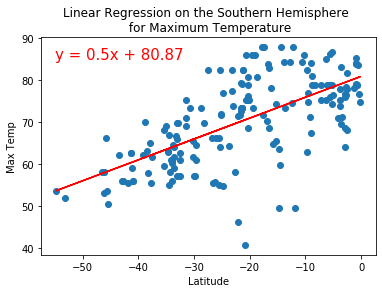

In [78]:
#linear regression on the southern_hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#call regression function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,85))

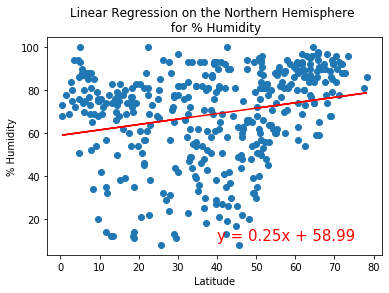

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

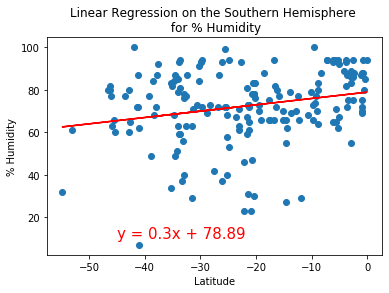

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-45,10))